In [30]:
from core.loader import load_movielens
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd


ratings, movies, users = load_movielens("datasets/ml-100k")

## Ratings

In [16]:
print(f"Ratings: {ratings.shape}")
display(ratings.head())

Ratings: (100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


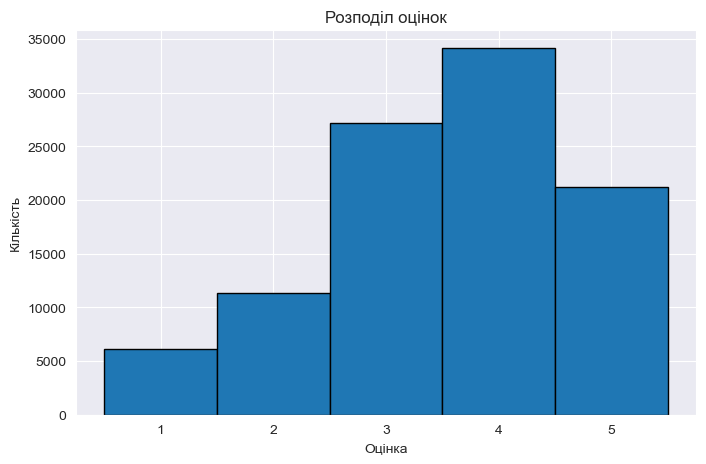

In [39]:
plt.figure(figsize=(8, 5))
ratings["rating"].hist(bins=[i*0.5 for i in range (1,12, 2)],edgecolor="black")
plt.title("Розподіл оцінок")
plt.xlabel("Оцінка")
plt.ylabel("Кількість")
plt.show()

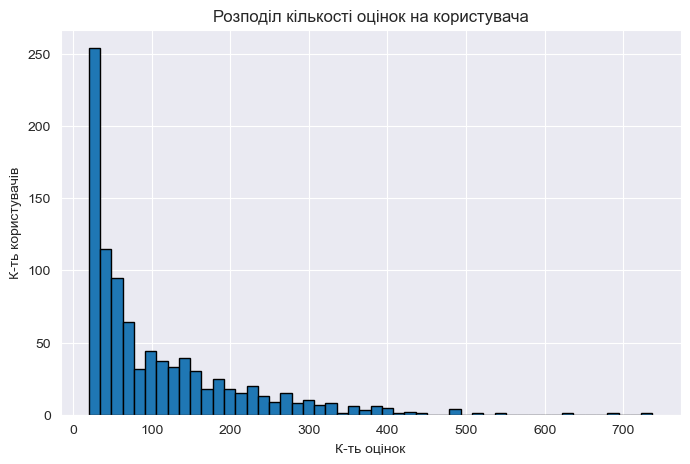

In [40]:
ratings_per_user = ratings.groupby("user_id").size()

plt.figure(figsize=(8, 5))
plt.hist(ratings_per_user, bins=50, edgecolor="black")
plt.title("Розподіл кількості оцінок на користувача")
plt.xlabel("К-ть оцінок")
plt.ylabel("К-ть користувачів")
plt.show()

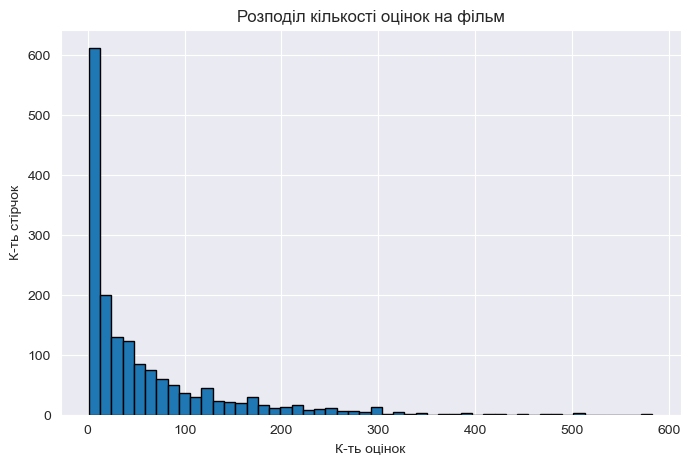

In [43]:
ratings_per_movie = ratings.groupby("movie_id").size()

plt.figure(figsize=(8, 5))
plt.hist(ratings_per_movie, bins=50, edgecolor="black")
plt.title("Розподіл кількості оцінок на фільм")
plt.xlabel("К-ть оцінок")
plt.ylabel("К-ть стірчок")
plt.show()

In [47]:
num_users = ratings["user_id"].nunique()
num_movies = ratings["movie_id"].nunique()
num_ratings = len(ratings)

sparsity = 1 - (num_ratings / (num_users * num_movies))
print(f"Розрідженість матриці: {sparsity*100:.2f}%")

Розрідженість матриці: 93.70%


## Movies

In [26]:
print(f"Movies: {movies.shape}")
display(movies.head())

Movies: (1682, 26)


,movie_id,title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,year_norm
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1995.0,0.39386
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,1,0,0,1995.0,0.39386
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995.0,0.39386
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1995.0,0.39386
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995.0,0.39386


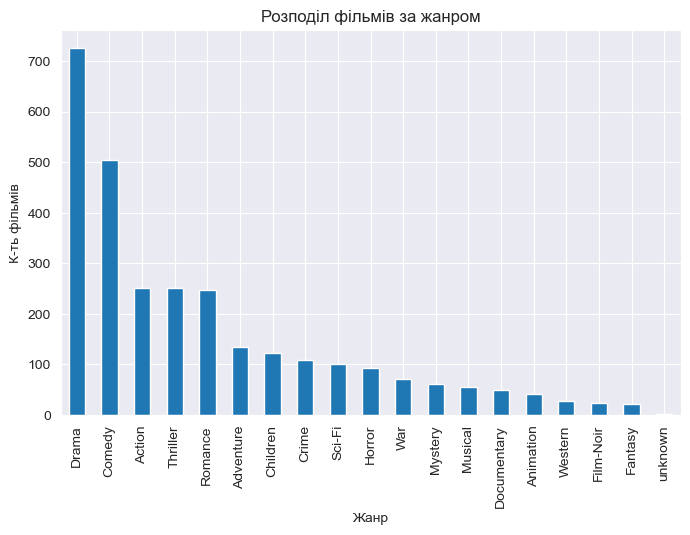

In [72]:
genre_cols = [c for c in movies.columns if movies[c].isin([0, 1]).all()]
genre_counts = movies[genre_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
genre_counts.plot(kind="bar")
plt.title("Розподіл фільмів за жанром")
plt.xlabel("Жанр")
plt.ylabel("К-ть фільмів")
plt.show()

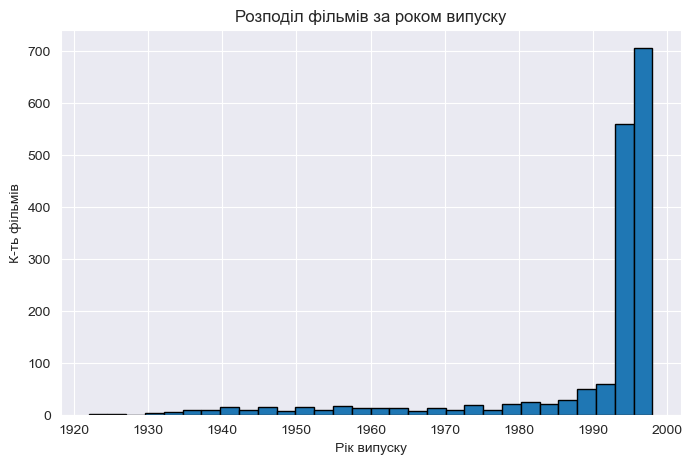

In [71]:
plt.figure(figsize=(8, 5))
movies["year"].hist(bins=30, edgecolor="black")
plt.title("Розподіл фільмів за роком випуску")
plt.xlabel("Рік випуску")
plt.ylabel("К-ть фільмів")
plt.show()

## Users

In [29]:
print(f"Users: {users.shape}")
display(users.head())

Users: (943, 5)


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


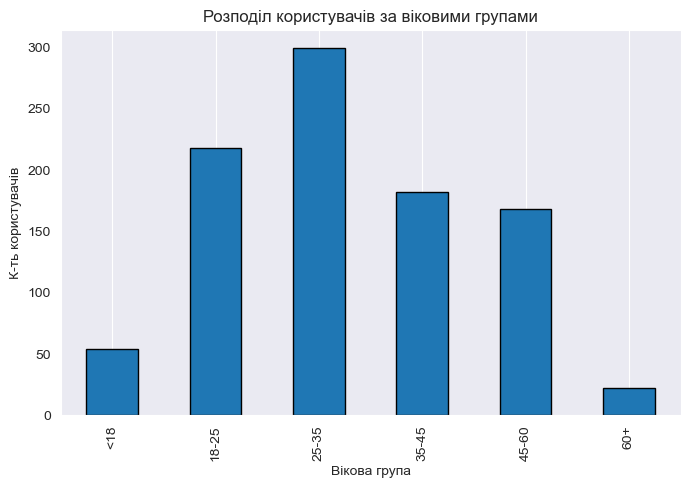

In [80]:
users["age_group"] = pd.cut(users["age"],
                            bins=[0, 18, 25, 35, 45, 60, 100],
                            labels=["<18", "18-25", "25-35", "35-45", "45-60", "60+"])

plt.figure(figsize=(8, 5))
users["age_group"].value_counts().loc[["<18", "18-25", "25-35", "35-45", "45-60", "60+"]].plot(kind="bar",edgecolor="black")
plt.title("Розподіл користувачів за віковими групами")
plt.xlabel("Вікова група")
plt.ylabel("К-ть користувачів")
plt.grid(axis='y')
plt.show()

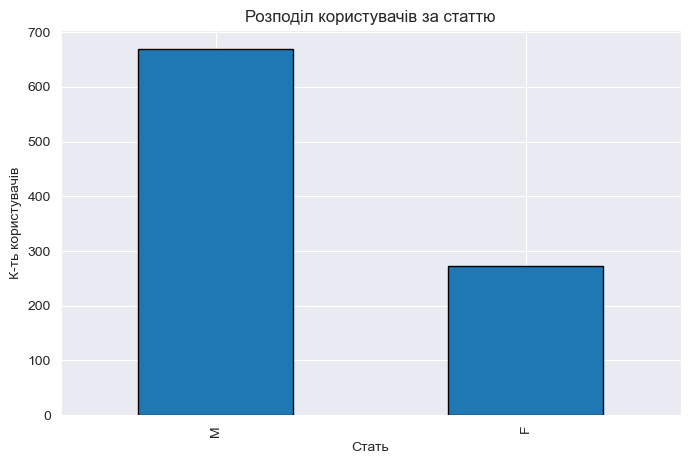

In [75]:
plt.figure(figsize=(8, 5))
users["gender"].value_counts().plot(kind="bar", edgecolor="black")
plt.title("Розподіл користувачів за статтю")
plt.xlabel("Стать")
plt.ylabel("К-ть користувачів")
plt.show()

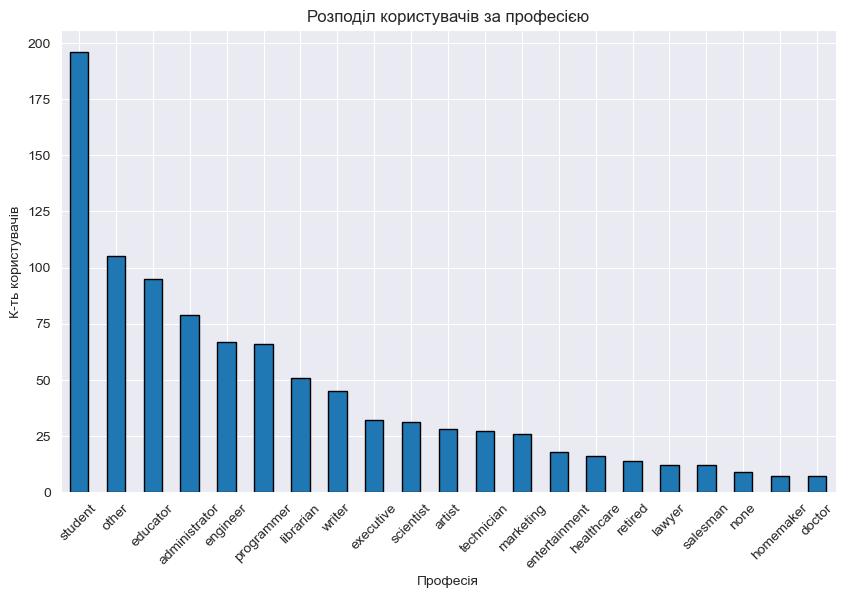

In [77]:
plt.figure(figsize=(8, 5))
users["occupation"].value_counts().plot(kind="bar", figsize=(10,6), edgecolor="black")
plt.title("Розподіл користувачів за професією")
plt.xlabel("Професія")
plt.ylabel("К-ть користувачів")
plt.xticks(rotation=45)
plt.show()